### Виконав: Овчар Антон, КА-64
# Лабараторна робота №7
## Задача Коші
#### 1. Умова: 
$\begin{cases} y'=\frac{x+y+2}{x+1} \\ y(0)=0 \end{cases}$
#### 2. Аналітичний розв'язок
$y'=\frac{x+y+2}{x+1} \\
y' - \frac{y+1}{x+1} = 1 \\
Замена: y=uv; y'=u'v+uv' \\
u'v+uv'-\frac{uv+1}{x+1}= 1 \\
\begin{cases} u(v'-\frac{v}{x+1})=0 \\ uv'-\frac{1}{x+1}=1 \end{cases} \\
1.\quad v'=\frac{v}{x+1} \\
\qquad \frac{dv}{v}=\frac{1}{x+1}dx \\
\qquad \int\frac{dv}{v}=\int\frac{1}{x+1}dx \\
\qquad \ln{v}=\ln{(x+1)} \\
\qquad v=x+1 \\
2.\quad u'v -\frac{1}{x+1}=1 \\
\qquad u'x+u' -\frac{1}{x+1}=1 \\
\qquad u'=\frac{x+2}{(x+1)^2} \\
\qquad u=\int\frac{x+2}{(x+1)^2}=c+ln{(x+1)}-\frac{1}{x+1} \\
y=uv=(x+1)(c+ln{(x+1)}-\frac{1}{x+1}) \\
y(0)=c-1=0 \Rightarrow c=1 \\
Ответ: y = x+(x+1)*ln{(x+1)}
$
#### 3. Чисельний розв'язок

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import random
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 7.5) # set default size of plots

##### Умова та точний розв'язок задачі

In [30]:
def f(x, y):
    return (x + y + 2)/(x + 1)

def real_y(x):
    return x+(x+1)*np.log(x+1)

##### Метод Рунге-Кутта

In [31]:
def runge_kutta(x0, y0, h, n):
    results = []
    x = x0
    y = y0
    for i in range(n+1):
        results.append(y)
        
        k1 = f(x, y)
        k2 = f(x+h/2, y+h/2*k1)
        k3 = f(x+h/2, y+h/2*k2)
        k4 = f(x+h, y+h*k3)
        x = x + h
        y = y + h / 6 * (k1 + 2*k2 + 2*k3 + k4)
    return results

##### Метод Адамса 4-го порядку

In [32]:
def adams(x0, y0, h, n):
    x0, x1, x2, x3 = [x0+i*h for i in range(4)]
    y0, y1, y2, y3 = runge_kutta(x0, y0, h, 3)
    results = []
    for i in range(n+1):
        results.append(y0)
        
        y4 = y3 + h / 24 * (55 * f(x3, y3) - 59 * f(x2, y2) + 37 * f(x1, y1) - 9 * f(x0, y0))
        x0, x1, x2, x3 = x1, x2, x3, x3 + h
        y0, y1, y2, y3 = y1, y2, y3, y4
    
    return results

##### Тест результатів роботи

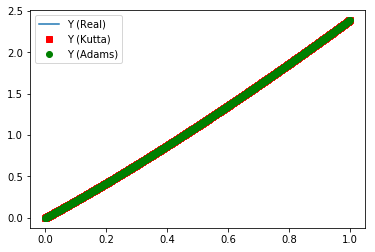

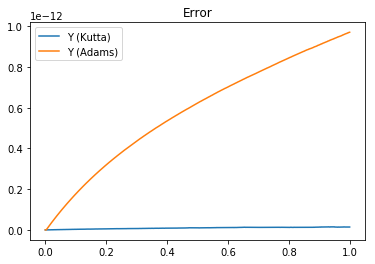

In [34]:
N = 1000
X0 = 0
X_END = X0 + 1
Y0 = 0
H = (X_END - X0) / N

res = pd.DataFrame({
    'X': [X0+i*H for i in range(N+1)],
    'Y (Kutta)': runge_kutta(X0, Y0, H, N),
    'Y (Adams)': adams(X0, Y0, H, N),
    'Y (Real)': [real_y(X0+i*H) for i in range(N+1)],
    'Error (Kutta)': np.fabs(runge_kutta(X0, Y0, H, N) - np.array([real_y(X0+i*H) for i in range(N+1)])),
    'Error (Adams)': np.fabs(adams(X0, Y0, H, N) - np.array([real_y(X0+i*H) for i in range(N+1)]))
})

plt.figure(1)
plt.plot(res['X'], res['Y (Real)'])
plt.plot(res['X'], res['Y (Kutta)'], 'rs')
plt.plot(res['X'], res['Y (Adams)'], 'go')
plt.legend()
plt.figure(2)
plt.plot(res['X'], res['Error (Kutta)'], label='Y (Kutta)')
plt.plot(res['X'], res['Error (Adams)'], label='Y (Adams)')
plt.legend()
plt.title('Error')
plt.show()

In [35]:
display(res)

,X,Y (Kutta),Y (Adams),Y (Real),Error (Kutta),Error (Adams)
0,0.000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
1,0.001,0.002000,0.002000,0.002000,7.676151e-17,7.676151e-17
2,0.002,0.004002,0.004002,0.004002,6.938894e-17,6.938894e-17
3,0.003,0.006004,0.006004,0.006004,8.673617e-18,8.673617e-18
4,0.004,0.008008,0.008008,0.008008,1.370432e-16,1.970646e-15
5,0.005,0.010012,0.010012,0.010012,5.724587e-17,4.154663e-15
6,0.006,0.012018,0.012018,0.012018,2.046974e-16,6.104492e-15
7,0.007,0.014024,0.014024,0.014024,1.249001e-16,8.274631e-15
8,0.008,0.016032,0.016032,0.016032,2.706169e-16,1.021058e-14
9,0.009,0.018040,0.018040,0.018040,1.908196e-16,1.236858e-14


#### Висновок
В цій лабораторній роботі ми освоїли 2 чисельних методу розв’язку задачі Коші з доволі гарною точністю. Виявилося, що метод Рунге-Кутта точніший за метод Адамса.